#Homework 1: kNN (20pt)
In this HW, you will write the $k$ Nearest Neighbors algorithm and run it on the synthetical data. Then, you will use the built-in function from *sklearn* library.

#Part I. Vanilla $k$NN (17.5pt)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
#import other modules here

In [2]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

1. (0.5pt) Check the shapes of $X$ and $y$

In [3]:
#your code here
np.array([X]).shape
np.array([y]).shape

(1, 300)

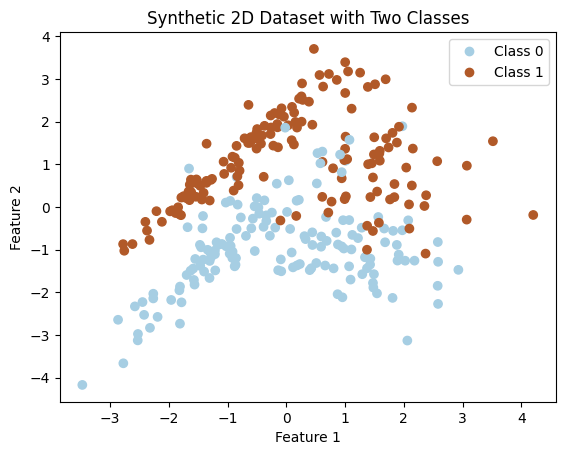

In [4]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

2. (1pt) Split the data into train and test sets. You can use a built-in [function train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn. (To get the same result as in the lecture slides, use the parameters from the example in the description of the function.)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

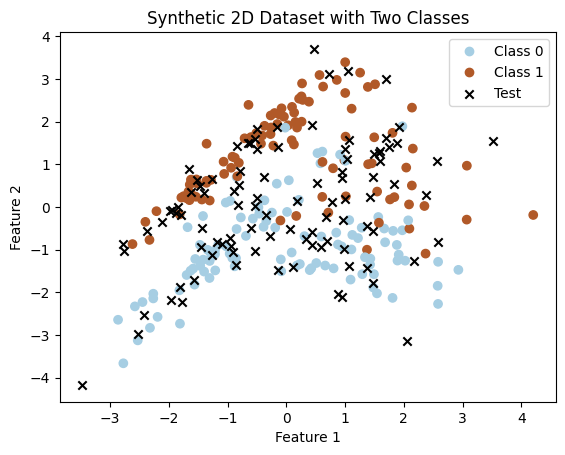

In [6]:
# Plot the synthetic dataset again
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0]+[scatter_test], labels=['Class 0', 'Class 1', 'Test'])

3. (9pt) Fill-in the functions *compute_distances_two_loops*, *compute_distances_one_loop*, and *predict_labels* of the followng class. Use $L_1$ (Manhattan) distance:
$$
d(x,\ x^{(i)}) =\sum_{j=1}^{d} |x_j-x^{(i)}_j|.
$$

In [7]:
class kNNClassifier:
  def __init__(self, k=1, n_loops=2):
     self.k = k
     self.n_loops = n_loops

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    if self.n_loops == 2:
      distances = self.compute_distances_two_loops(X)
    elif self.n_loops == 1:
      distances = self.compute_distances_one_loop(X)
    return self.predict_labels(distances)

  def compute_distances_two_loops(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #your code here
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    distances = np.zeros((n_test_samples, n_train_samples))

    for i in range(n_test_samples):
      for j in range(n_train_samples):
        distances[i, j] = np.sum(np.abs(X[i] - self.train_X[j]))

    return distances

  def compute_distances_one_loop(self, X): #or without for loops at all (see ML2 problems)
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #your code here
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    distances = np.zeros((n_test_samples, n_train_samples))

    for i in range(n_test_samples):
      distances[i, :] = np.sum(np.abs(X[i] - self.train_X), axis=1)

    return distances

  def predict_labels(self, distances):
    """
    distances: np array (n_test_samples, n_train_samples)
    output: np array (n_test_samples,)
    """
    #your code here
    n_test_samples = distances.shape[0]
    labels = np.zeros(n_test_samples, dtype=int)

    for i in range(n_test_samples):
      # Find the indices of the k-nearest neighbors
      k_nearest_indices = np.argsort(distances[i])[:self.k]

      # Get the labels of the k-nearest neighbors
      k_nearest_labels = self.train_y[k_nearest_indices]

      # Assign the most common label to the test sample
      labels[i] = np.argmax(np.bincount(k_nearest_labels))

      return labels

4. Fit the model with 2 for loops (one neighbor)

In [8]:
# create an object of the class above
clf_2 = kNNClassifier()

In [9]:
# fit the model on the training data
clf_2.fit(X_train,y_train)

5. Fit the model with 1 for loop

In [10]:
# create an object of the class above
clf_1 = kNNClassifier(n_loops=1)

In [11]:
# fit the model on the training data
clf_1.fit(X_train,y_train)

6a). (0.5pt) Make a prediction on the points with coordinates $(0, -2)$

In [12]:
# Create an instance of kNNClassifier with k=3 and n_loops=2
knn = kNNClassifier(k=3, n_loops=2)

# Fit the classifier with your training data
knn.fit(X_train, y_train)

# Make a prediction on the point (0, -2)
test_point = np.array([[0, -2]])
prediction = knn.predict(test_point)

print("Predicted class for point (0, -2):", prediction)

Predicted class for point (0, -2): [0]


6b). (0.5pt) Make a prediction on the points with coordinates $(0, 2)$

In [13]:
# Create an instance of kNNClassifier with k=3 and n_loops=2
knn = kNNClassifier(k=3, n_loops=2)

# Fit the classifier with your training data
knn.fit(X_train, y_train)

# Make a prediction on the point (0, 2)
test_point = np.array([[0, 2]])
prediction = knn.predict(test_point)

print("Predicted class for point (0, 2):", prediction)

Predicted class for point (0, 2): [1]


7. Plot the decision boundary. You can use function [plot_decision_regions](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions)

6.901641845703125

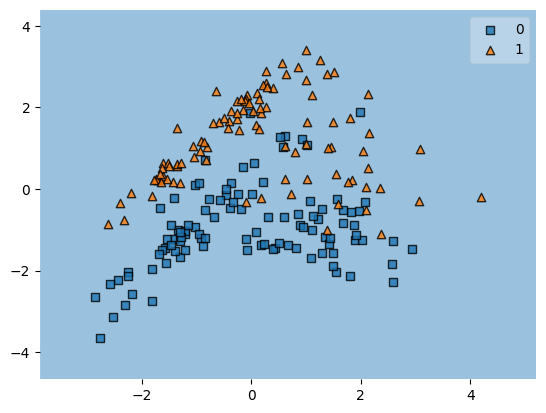

In [14]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_1)
end_time = time.time()
end_time - start_time

KeyboardInterrupt: 

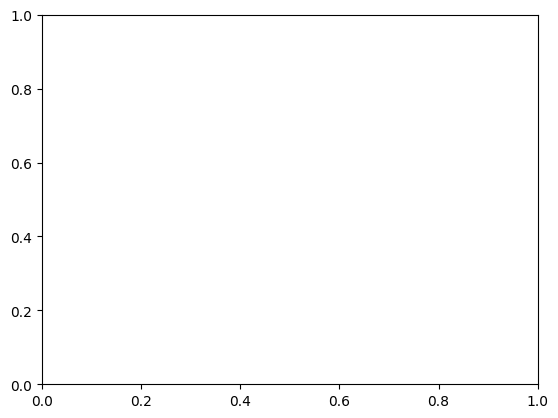

In [15]:
#You may whant to compare the performance with loops
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_2)
end_time = time.time()
end_time - start_time

8. (2.5pt) Now, use the built-in class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Think about what parameter to use in order to get the same plot as above.

In [18]:
# your code here
clf_3 = kNNClassifier(n_loops=2)

In [19]:
# fit the model on the training data
clf_3.fit(X_train,y_train)

KeyboardInterrupt: 

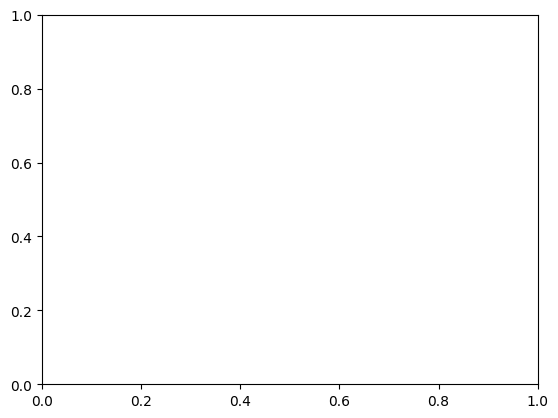

In [20]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_3)
end_time = time.time()
end_time - start_time

9. (3pt) Choose $k.$  Write a for loop over 40 values of $k,$ for every $k$ train the fastest model on the train data and make prediction on the train and on the test data and store the accuracy on both sets. Plot the curves similar to ones in Lecture 2. To calculate accuracy you can use function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).  

In [16]:
from sklearn.metrics import accuracy_score

# Define the range of k values to loop over
k_values = range(1, 41)

# Lists to store accuracy scores for train and test sets
train_accuracies = []
test_accuracies = []

for k in k_values:
    # Create an instance of kNNClassifier with the current k value and n_loops=2
    knn = kNNClassifier(k=k, n_loops=2)

    # Fit the classifier with your training data
    knn.fit(X_train, y_train)

    # Make predictions on the train and test data
    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)

    # Calculate accuracy scores and append to the lists
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print or use the accuracy scores as needed
for k, train_acc, test_acc in zip(k_values, train_accuracies, test_accuracies):
    print(f"K = {k}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")


K = 1: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 2: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 3: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 4: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 5: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 6: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 7: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 8: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 9: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 10: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 11: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 12: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 13: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 14: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 15: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 16: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 17: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K = 18: Train Accuracy = 0.5174, Test Accuracy = 0.4747
K

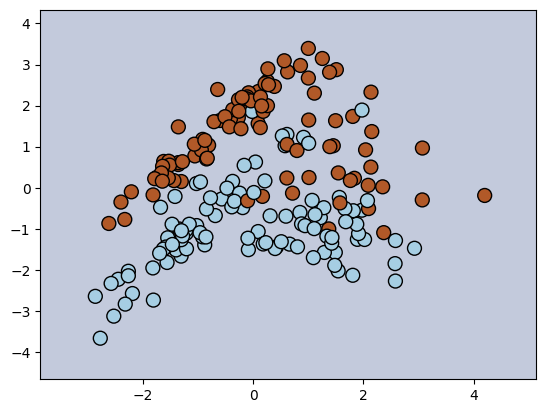

In [ ]:
# Define the range for the meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid points
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf_3.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, linewidth=1, cmap=plt.cm.Paired)

# Show the plot
plt.show()

10. For the 'best' $k$ plot the desicion boundary.

In [17]:
#The algorithm with this k seems to do a good job since the plotted data looks incredibly similar to that of clf_1

11. (0.5pt) Does the algorithm this this $k$ do a good job?

#Part II. Weighted $k$NN (2.5pt)

1. (1.5pt) Modify the *predict_labels* function so that the score for class $c$ is calculated as follows:
$$
q(x)=\sum_{i=1}^{k}[y^{(i)}=c] \cdot \frac{1}{1+d(x,\ x^{(i)})}
$$
and the class with highest value of $q(x)$ is chosen as the label.

In [30]:
class kNNClassifier_w:
  def __init__(self, k=1):
     self.k = k

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    distances = self.compute_distances(X)
    return self.predict_labels(distances)

  def compute_distances(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #thake the best from Part I
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    distances = np.zeros((n_test_samples, n_train_samples))

    for i in range(n_test_samples):
      distances[i, :] = np.sum(np.abs(X[i] - self.train_X), axis=1)

    return distances

  def predict_labels(self, distances):
    labels = np.zeros(len(distances))
    #your code here

    n_test_samples = distances.shape[0]
    labels = np.zeros(n_test_samples, dtype=int)

    for i in range(n_test_samples):
      # Find the indices of the k-nearest neighbors
      k_nearest_indices = np.argsort(distances[i])[:self.k]

      # Get the labels of the k-nearest neighbors
      k_nearest_labels = self.train_y[k_nearest_indices]

      # Calculate the scores for each class using the provided formula
      scores = np.zeros(self.k)
      for c in range(self.k):
        scores[c] = np.sum(k_nearest_labels == c) * (1 / (1 + distances[i, k_nearest_indices[c]]))

        # Assign the class with the highest score to the test sample
        labels[i] = np.argmax(scores)

        return labels

2. Run this algorithm for $k=3$ and plot the desicion boundary.

In [31]:
clf_w = kNNClassifier_w(k=3)

In [32]:
clf_w.fit(X_train,y_train)

<Axes: >

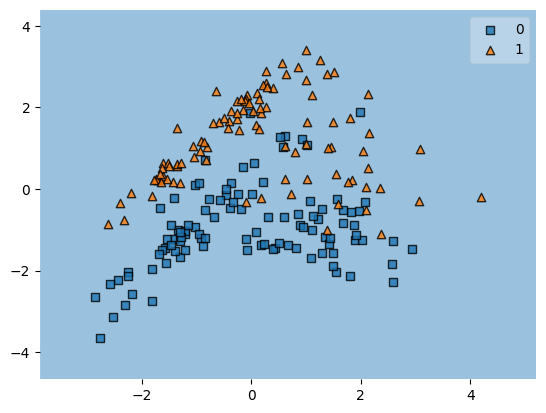

In [33]:
plot_decision_regions(X_train,y_train,clf_w)

3. (1pt) Use the buit-in algorithm with collable function

In [35]:
def func(d):
  return sum(1/(1+d))

4. Does the desicion boundary look the same? You can also compare it with vanilla algorithm.

In [36]:
#yes, to me it looks exactly the same, which probably means I did something wrong along the way.